## Data Cleaning

In [6]:
raw_data_extracted = 'raw_data_unzipped'

In [190]:
import shutil

def delete_dir(dir_to_delete):
    try:
        file_count = sum([len(files) for r, d, files in os.walk(dir_to_delete)])
        shutil.rmtree(dir_to_delete)
        print(f"Directory {dir_to_delete} and all its contents ({file_count} files) have been successfully deleted.")
    except Exception as e:
        print(f"An error occurred while trying to delete the directory: {e}")


# This is in case of testing and if the initial raw files need to be deleted. 
delete_dir(raw_data_extracted)

Directory raw_data_unzipped and all its contents (4687 files) have been successfully deleted.


In [191]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    return extract_to



raw_data_zip = 'raw_data/midi_classic_music_data.zip'
raw_data_extracted = unzip_file(raw_data_zip, raw_data_extracted)

display(f"Extracted to: {raw_data_extracted}")

'Extracted to: raw_data_unzipped'

In [192]:
import os
import shutil

def move_contents_up_one_dir(path):
    path = os.path.abspath(path)
    parent_dir = os.path.dirname(path)
    if path == parent_dir or not os.path.exists(path):
        print("Operation not allowed or path does not exist.")
        return
    for item in os.listdir(path):
        shutil.move(os.path.join(path, item), os.path.join(parent_dir, item))
    os.rmdir(path)
    print(f"All contents moved from {path} to {parent_dir} and directory removed.")

move_contents_up_one_dir(os.path.join(raw_data_extracted, 'midiclassics'))


All contents moved from /Users/zaina/Desktop/Masters-class/AAI-511-Final-Project/raw_data_unzipped/midiclassics to /Users/zaina/Desktop/Masters-class/AAI-511-Final-Project/raw_data_unzipped and directory removed.


In [193]:
def rename_mid_files(directory):
    rename_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.MID'):
                old_file_path = os.path.join(root, file)
                new_file_path = os.path.join(root, file[:-4] + '.mid')
                os.rename(old_file_path, new_file_path)
                rename_count += 1
                # print(f'Renamed: {old_file_path} to {new_file_path}')
    return rename_count

def delete_zip_files(directory):
    delete_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.zip'):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                delete_count += 1
                # print(f'Deleted: {file_path}')
    return delete_count

# some files seem to have .MID
renamed_files_count = rename_mid_files(raw_data_extracted)
print(f'Total .MID files renamed: {renamed_files_count}')
# Also, there are zip files are duplications of the files
deleted_files_count = delete_zip_files(raw_data_extracted) 
print(f'Total .zip files deleted: {deleted_files_count}')


Total .MID files renamed: 732
Total .zip files deleted: 31


In [194]:
import os

def categorize_files_by_dir(path):
    files_and_dirs = os.listdir(path)
    directories = {name for name in files_and_dirs if os.path.isdir(os.path.join(path, name))}
    file_dict = {}
    unassigned_files = {}

    for file_name in files_and_dirs:
        file_path = os.path.join(path, file_name)
        if os.path.isfile(file_path) and file_name.endswith('.mid'):
            first_word = file_name.split()[0]
            if first_word in directories:
                if first_word not in file_dict:
                    file_dict[first_word] = []
                file_dict[first_word].append(file_name)
            else:
                if first_word not in unassigned_files:
                    unassigned_files[first_word] = []
                unassigned_files[first_word].append(file_name)

    return file_dict, unassigned_files, sorted(directories)

def display_info(categorized_files, unassigned_files):
    print("Categorized Files Summary:")
    for key, files in categorized_files.items():
        print(f"Artist '{key}': {len(files)} files")
    
    print("\nUnassigned Files Summary:")
    if unassigned_files:
        for key, files in unassigned_files.items():
            print(f"Artist '{key}': {len(files)} files")
    else:
        print("No unassigned files found.")

categorized_files, unassigned_files, all_artists = categorize_files_by_dir(raw_data_extracted)

print("Categorized Files Summary:")
for key, files in categorized_files.items():
    print(f"Artist {key}: {len(files)} files")

print("\nUnassigned Files Summary:")
for key, files in unassigned_files.items():
    print(f"Artist {key}: {len(files)} files")


Categorized Files Summary:
Artist Liszt: 7 files
Artist Tchaikovsky: 13 files
Artist Ginastera: 1 files
Artist Kuhlau: 5 files
Artist Debussy: 4 files
Artist Dvorak: 6 files
Artist Grieg: 2 files
Artist Bartok: 2 files
Artist Sibelius: 1 files
Artist Wagner: 1 files

Unassigned Files Summary:
Artist Rothchild: 11 files
Artist Diabelli: 11 files
Artist Bizet: 5 files
Artist Tchaicovsky: 1 files
Artist Reinecke: 3 files
Artist Buxethude: 13 files
Artist Gershuin: 1 files
Artist Nicolai: 1 files
Artist Rimsky: 1 files
Artist Rothchlid: 1 files
Artist meditation: 1 files
Artist Pollen: 1 files
Artist Pachebel: 5 files
Artist C.P.E.Bach: 1 files
Artist Reger: 3 files
Artist Lizt: 1 files


In [195]:
corrections_to_file_placement = {
    'Pachebel': 'Pachelbel',
    'Lizt': 'Liszt'
}

for old_key, new_key in corrections_to_file_placement.items():
    if old_key in unassigned_files:
        unassigned_files[new_key] = unassigned_files.pop(old_key)

In [196]:
def move_folder_contents(src_folder, dest_folder):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    
    for item in os.listdir(src_folder):
        src_item = os.path.join(src_folder, item)
        dest_item = os.path.join(dest_folder, item)
        
        if os.path.isdir(src_item):
            shutil.move(src_item, dest_folder)
        else:
            shutil.move(src_item, dest_item)
    
    # Delete the source folder regardless of its contents
    delete_dir(src_folder)

name_corrections_folder = {
    "Albe'niz": "Albeniz",
    "Albe╠üniz": "Albeniz",
    "Mendelsonn": "Mendelssohn",
    "Tchakoff": "Tchaikovsky",
    "Handel": "Handel",
    "Haendel": "Handel",
    "Straus": "Strauss",
    "Strauss, J": "Strauss"
}

In [197]:
for src_folder, dest_folder in name_corrections_folder.items():
    src_path = os.path.join(raw_data_extracted, src_folder)
    dest_path = os.path.join(raw_data_extracted, dest_folder)
    print(f"Moving contents from {src_path} to {dest_path}...")
    move_folder_contents(src_path, dest_path)

print("Folder contents moved and directories deleted successfully.")

Moving contents from raw_data_unzipped/Albe'niz to raw_data_unzipped/Albeniz...
Directory raw_data_unzipped/Albe'niz and all its contents (0 files) have been successfully deleted.
Moving contents from raw_data_unzipped/Albe╠üniz to raw_data_unzipped/Albeniz...
Directory raw_data_unzipped/Albe╠üniz and all its contents (0 files) have been successfully deleted.
Moving contents from raw_data_unzipped/Mendelsonn to raw_data_unzipped/Mendelssohn...
Directory raw_data_unzipped/Mendelsonn and all its contents (0 files) have been successfully deleted.
Moving contents from raw_data_unzipped/Tchakoff to raw_data_unzipped/Tchaikovsky...
Directory raw_data_unzipped/Tchakoff and all its contents (0 files) have been successfully deleted.
Moving contents from raw_data_unzipped/Handel to raw_data_unzipped/Handel...
Directory raw_data_unzipped/Handel and all its contents (1 files) have been successfully deleted.
Moving contents from raw_data_unzipped/Haendel to raw_data_unzipped/Handel...
Directory raw

In [198]:
def move_files_to_directories(base_path, files_to_move):
    for directory, files in files_to_move.items():
        dir_path = os.path.join(base_path, directory)
        # Create directory if it doesn't exist
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
        # Move each file to the new directory
        for file_name in files:
            shutil.move(os.path.join(base_path, file_name), os.path.join(dir_path, file_name))

move_files_to_directories(raw_data_extracted,categorized_files)


In [199]:
move_files_to_directories(raw_data_extracted,unassigned_files)

In [200]:
print({name for name in os.listdir(raw_data_extracted) if os.path.isdir(os.path.join(raw_data_extracted, name))})

{'Laurent', 'Chasins', 'Ganne', 'Brahms', 'Sudds', 'Pachelbel', 'Ravel', 'Sinding', 'Mehul', 'Becker', 'Wolf', 'Kuhlau', 'Faure', 'Alkan', 'Copland', 'Durand, E', 'Reger', 'Bernstein', 'Czerny', 'Burgmuller', 'Nicolai', 'Thomas', 'Cramer', 'Bach', 'Mussorgski', 'Tchaicovsky', 'Vivaldi', 'Mozart', 'Czibulka', "Varios - Ti'tulo desconocido", 'Schumann', 'Finck', 'Beethoven', 'Komzak', 'Diabelli', 'Handel', 'Borodin', 'Jensen', 'Barber', 'Sibelius', 'Lemire', 'Hiller', 'Durand, MA', 'Sullivan', 'Hummel', 'Berlin', 'Raff', 'Liszt', 'Bizet', 'Le Thiere', 'Tarrega', 'Gershwin', 'Buxethude', 'meditation', 'Bartok', 'Bacewitz', 'Buxehude', 'Paderewski', 'Verdi', 'Dvorak', 'Rossini', 'Friedman', 'Arensky', 'Debussy', 'Sarasate', 'Pridhan', 'Couperin', 'MacBeth', 'Bellini', 'Chabrier', 'Paradisi', 'Skriabin', 'Heidrich', 'Flotow', 'Taube', 'Vaughan', 'Tchaikovsky', 'Griffes', 'Haydn', 'Wagner', 'MacCunn', 'Herold', 'Paganini', 'Grieg', 'Field', 'Bartelet', 'Dussek', 'Lecuona', 'Busoni', 'Clement

In [ ]:
specific_artists = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

Error processing raw_data_unzipped/Mozart/Piano Sonatas/Nueva carpeta/K281 Piano Sonata n03 3mov.mid: Could not decode key with 2 flats and mode 2
Error processing raw_data_unzipped/Beethoven/Anhang 14-3.mid: Could not decode key with 3 flats and mode 255


<Figure size 1000x600 with 0 Axes>

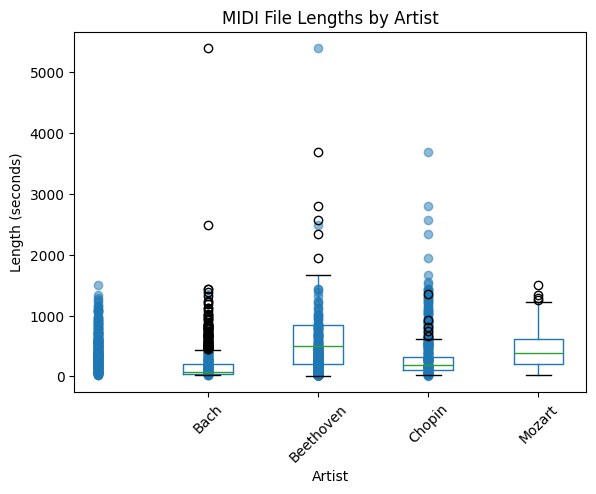

In [9]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import mido
from mido import MidiFile, bpm2tempo, tick2second

# Function to calculate the length of a MIDI file
def calculate_midi_length(file_path):
    try:
        midi_file = MidiFile(file_path)
        total_time = 0.0

        for track in midi_file.tracks:
            current_time = 0.0
            tempo = bpm2tempo(120)  # Default tempo is 120 BPM
            for msg in track:
                if msg.is_meta and msg.type == 'set_tempo':
                    tempo = msg.tempo
                current_time += tick2second(msg.time, midi_file.ticks_per_beat, tempo)
            if current_time > total_time:
                total_time = current_time

        return total_time
    except mido.KeySignatureError as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Define the base directory and artists
base_directory = raw_data_extracted
specific_artists = ['Bach', 'Beethoven', 'Chopin', 'Mozart']
midi_lengths = {}

# Recursively walk through the directories and calculate lengths
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith('.mid'):
            file_path = os.path.join(root, file)
            relative_path = os.path.relpath(file_path, base_directory)
            for artist in specific_artists:
                if artist in relative_path:
                    midi_length = calculate_midi_length(file_path)
                    if midi_length is not None:
                        midi_lengths[relative_path] = midi_length
                    break

# Create a DataFrame for plotting
data = {'Artist': [], 'Length': []}
for path, length in midi_lengths.items():
    for artist in specific_artists:
        if artist in path:
            data['Artist'].append(artist)
            data['Length'].append(length)
            break

df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(10, 6))
df.boxplot(by='Artist', column=['Length'], grid=False)
plt.scatter(df['Artist'], df['Length'], alpha=0.5)
plt.title('MIDI File Lengths by Artist')
plt.suptitle('')
plt.xlabel('Artist')
plt.ylabel('Length (seconds)')
plt.xticks(rotation=45)
plt.show()


In [14]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import mido
from mido import MidiFile, bpm2tempo, tick2second

# Function to calculate the length of a MIDI file
def calculate_midi_length(file_path):
    try:
        midi_file = MidiFile(file_path)
        total_time = 0.0

        for track in midi_file.tracks:
            current_time = 0.0
            tempo = bpm2tempo(120)  # Default tempo is 120 BPM
            for msg in track:
                if msg.is_meta and msg.type == 'set_tempo':
                    tempo = msg.tempo
                current_time += tick2second(msg.time, midi_file.ticks_per_beat, tempo)
            if current_time > total_time:
                total_time = current_time

        return total_time
    except mido.KeySignatureError as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Function to walk through directories and calculate MIDI lengths for a specific artist
def get_midi_lengths_for_artist(artist_directory):
    midi_lengths = {}
    file_count = 0
    
    for root, dirs, files in os.walk(artist_directory):
        for file in files:
            if file.endswith('.mid'):
                file_path = os.path.join(root, file)
                relative_path = os.path.relpath(file_path, base_directory)
                midi_length = calculate_midi_length(file_path)
                if midi_length is not None:
                    midi_lengths[relative_path] = midi_length
                    file_count += 1
    
    return midi_lengths, file_count

base_directory = raw_data_extracted
specific_artists = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# Dictionary to hold all results
all_midi_lengths = {}
artist_file_counts = {}

# Get the MIDI lengths and file counts for each artist
for artist in specific_artists:
    artist_directory = os.path.join(base_directory, artist)
    midi_lengths, file_count = get_midi_lengths_for_artist(artist_directory)
    all_midi_lengths.update(midi_lengths)
    artist_file_counts[artist] = file_count



Error processing raw_data_unzipped/Beethoven/Anhang 14-3.mid: Could not decode key with 3 flats and mode 255
Error processing raw_data_unzipped/Mozart/Piano Sonatas/Nueva carpeta/K281 Piano Sonata n03 3mov.mid: Could not decode key with 2 flats and mode 2


In [25]:
# Print the count of MIDI files for each artist
for artist, count in artist_file_counts.items():
    print(f"{artist}: {count} MIDI files")

Bach: 1024 MIDI files
Beethoven: 212 MIDI files
Chopin: 136 MIDI files
Mozart: 256 MIDI files


<Figure size 1200x800 with 0 Axes>

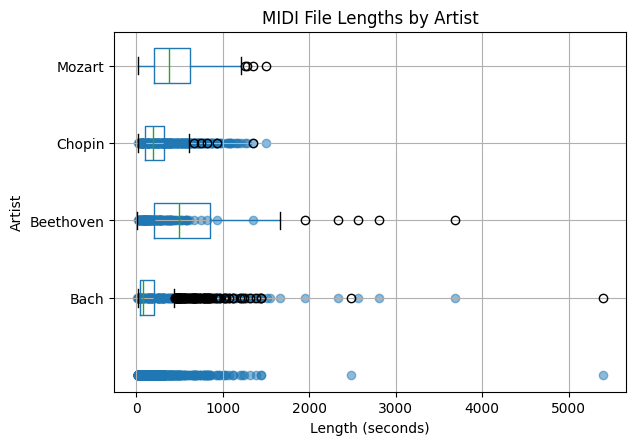

In [23]:
# Create the initial DataFrame directly from the dictionary
midi_file_lengths_df = pd.DataFrame(list(all_midi_lengths.items()), columns=['Path', 'Length'])
midi_file_lengths_df['Artist'] = midi_file_lengths_df['Path'].apply(lambda x: next((artist for artist in specific_artists if artist in x), 'Unknown'))


# Create horizontal box plots
plt.figure(figsize=(12, 8))
midi_file_lengths_df.boxplot(by='Artist', column=['Length'], vert=False)
plt.scatter(midi_file_lengths_df['Length'], midi_file_lengths_df['Artist'], alpha=0.5)
plt.title('MIDI File Lengths by Artist')
plt.suptitle('')
plt.xlabel('Length (seconds)')
plt.ylabel('Artist')
plt.yticks(rotation=0)
plt.show()